In [1]:
import numpy as np

In [2]:
# initialize all equal
def initialize(N_SIZE):
    return np.ones(N_SIZE), np.ones(N_SIZE)
N_SIZE = 10
grp1, grp2 = initialize(N_SIZE)

In [10]:
alpha, beta = 0.2, 0.15
def make_exchanges(grp1, grp2):
    #R = np.random.random(N_SIZE)
    grp1 *= (1 + alpha)
    grp2 *= (1 - beta)
    
    return grp1, grp2
grp1, grp2 = make_exchanges(grp1, grp2)
grp1, grp2


(array([1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]),
 array([0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]))

In [14]:
np.min(np.vstack((grp1, grp2)), axis=0)

array([0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85])

In [4]:
def shuffle_pairs(grp1, grp2):
    combined = np.hstack((grp1, grp2))
    np.random.shuffle(combined)
    assert(len(combined) == len(grp1) + len(grp2))
    return combined[:N_SIZE], combined[N_SIZE:]
grp1, grp2 = shuffle_pairs(grp1, grp2)
grp1, grp2

(array([0.85, 0.85, 1.2 , 1.2 , 1.  , 1.2 , 1.2 , 0.85, 1.2 , 0.85]),
 array([1.  , 1.  , 1.  , 1.  , 1.2 , 1.  , 0.85, 0.85, 1.  , 1.  ]))

In [5]:
def pop_stats(grp1, grp2):
    combined = np.hstack((grp1, grp2))
    return np.mean(combined), np.std(combined), np.min(combined), np.max(combined)
pop_stats(grp1, grp2)

(1.0150000000000001, 0.136106575888162, 0.85, 1.2)

In [6]:
def ranked(grp1, grp2):
    combined = np.hstack((grp1, grp2))
    return sorted(combined)
ranked(grp1, grp2)

[0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2]

In [14]:
alpha, beta = 0.015, 0.01
N_STEPS = 4000

In [15]:
# initialize all equal
N_SIZE = 20
grp1 = np.ones(N_SIZE)
grp2 = np.ones(N_SIZE)
mus, sigs = [], []
mins, maxs = [], []
for t in range(N_STEPS):
    grp1, grp2 = make_exchanges(grp1, grp2)
    grp1, grp2 = shuffle_pairs(grp1, grp2)
    mu, sig, _min, _max = pop_stats(grp1, grp2)
    mus.append(mu)
    sigs.append(sig)
    mins.append(_min)
    maxs.append(_max)

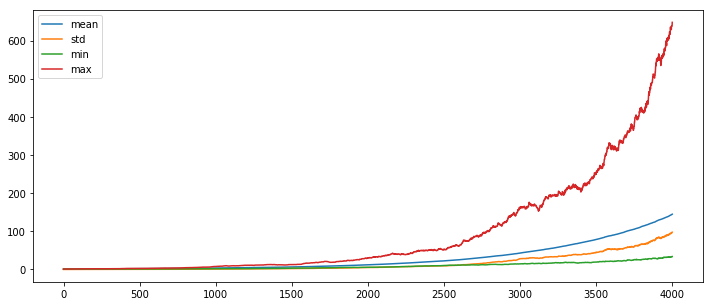

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(mus, label='mean')
ax.plot(sigs, label='std')
ax.plot(mins, label='min')
ax.plot(maxs, label='max')
ax.legend()

(array([2., 1., 2., 0., 5., 2., 3., 5., 1., 5., 1., 5., 2., 2., 1., 1., 1.,
        0., 0., 1.]),
 array([1.63362938, 1.85283451, 2.07203964, 2.29124477, 2.5104499 ,
        2.72965502, 2.94886015, 3.16806528, 3.38727041, 3.60647554,
        3.82568067, 4.0448858 , 4.26409093, 4.48329606, 4.70250119,
        4.92170632, 5.14091145, 5.36011658, 5.57932171, 5.79852683,
        6.01773196]),
 <a list of 20 Patch objects>)

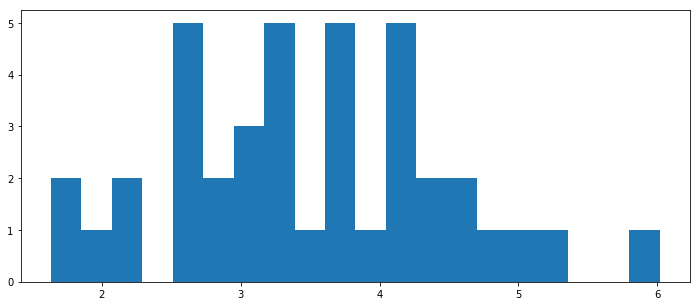

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(ranked(grp1, grp2), bins=20, label='ranked')

In [30]:
grp1

array([2.48789848e+11, 1.00603213e+11, 1.84475228e+10, 4.17495928e+10,
       1.26263122e+10, 1.45630973e+10, 3.62589755e+10, 2.39799037e+10,
       3.47990983e+10, 1.35802829e+11, 2.36835672e+10, 3.20724245e+10,
       4.59029880e+10, 6.06402687e+10, 9.29802641e+09, 7.94287483e+09,
       4.12657811e+11, 1.57507864e+10, 7.58179741e+11, 2.51910937e+10,
       7.77695557e+10, 3.51610823e+10, 4.14259788e+11, 9.65638304e+09,
       8.24627736e+10, 5.73834690e+09, 2.34168478e+10, 2.72920417e+10,
       1.22075592e+10, 7.20460216e+10, 3.05268527e+11, 9.36477425e+09,
       4.25937358e+10, 6.94493090e+10, 1.41765029e+11, 5.05900584e+10,
       2.97095488e+10, 1.42643245e+11, 1.21031155e+11, 2.78162163e+09,
       1.87598683e+11, 1.63413323e+11, 1.05607647e+11, 1.27283286e+10,
       2.73304700e+10, 5.58619655e+09, 3.85242153e+10, 8.84468024e+10,
       6.16873817e+10, 5.64598729e+09, 2.38559545e+11, 3.26943784e+10,
       2.48448072e+10, 9.95840651e+10, 3.47679972e+10, 2.55824262e+10,
      